# Existence of Local Optima

In [78]:
import torch
import numpy
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from attacks.advdist import AdversarialDistributionTransform
from mpl_toolkits.axes_grid1 import ImageGrid

In [24]:
affine = AdversarialDistributionTransform(detector=None, transform='affineV0')
color = AdversarialDistributionTransform(detector=None, transform='colorV1')

In [119]:
d_sample = torch.load('svhn_OE_affine_MH_sample.pkl')
l_z, l_E, batch = d_sample['l_x'][:2000], d_sample['l_E'][:2000], d_sample['img']
min_e, argmin_e = l_E.min(dim=0)
min_z = l_z[argmin_e, range(len(argmin_e))]
l_x = affine.transform(batch, x=min_z)
MH_x = l_x
MH_e = min_e

In [111]:
d_sample = torch.load('svhn_OE_affine_coord_sample_1.pkl')
l_z, l_E, batch = d_sample['l_x'], d_sample['l_E'], d_sample['img']
min_e, argmin_e = l_E.min(dim=0)
min_z = l_z[argmin_e, range(len(argmin_e))]
l_x = affine.transform(batch, x=min_z)
coord_x_1 = l_x
coord_min_e_1 = min_e

d_sample = torch.load('svhn_OE_affine_coord_sample_2.pkl')
l_z, l_E, batch = d_sample['l_x'], d_sample['l_E'], d_sample['img']
min_e, argmin_e = l_E.min(dim=0)
min_z = l_z[argmin_e, range(len(argmin_e))]
l_x = affine.transform(batch, x=min_z)
coord_x_2 = l_x
coord_min_e_2 = min_e

d_sample = torch.load('svhn_OE_affine_coord_sample_3.pkl')
l_z, l_E, batch = d_sample['l_x'], d_sample['l_E'], d_sample['img']
min_e, argmin_e = l_E.min(dim=0)
min_z = l_z[argmin_e, range(len(argmin_e))]
l_x = affine.transform(batch, x=min_z)
coord_x_3 = l_x
coord_min_e_3 = min_e

In [126]:
import matplotlib.gridspec as gridspec

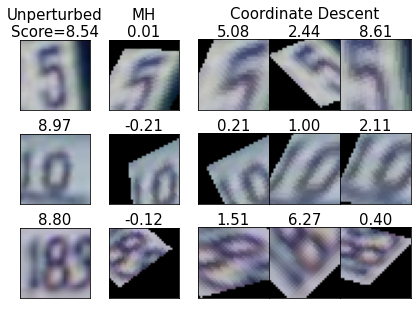

In [227]:
fig = plt.figure(figsize=(7,4.9))
outer = gridspec.GridSpec(1, 5, wspace=0.3, hspace=0.3, width_ratios=[1.2, 1.2, 1, 1, 1])
plt_original = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[0])
plt_mh = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[1])
plt_coord = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=outer[2:], wspace=0.)

l_selected = [25,3,9]
for i_row, i_img in enumerate(l_selected):
    
    ax = plt.Subplot(fig, plt_original[i_row])
    if i_row == 0:
        ax.set_title(f'Unperturbed\nScore={float(img_E[i_img]):.2f}', fontsize=15, pad=0)
    else:
        ax.set_title(f'{float(img_E[i_img]):.2f}', fontsize=15, pad=0)
    ax.imshow(batch[i_img].permute(1,2,0)); fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    ax = plt.Subplot(fig, plt_mh[i_row])
    if i_row == 0:
        ax.set_title(f'MH\n{float(MH_e[i_img]):.2f}', fontsize=15, pad=0)
    else:
        ax.set_title(f'{float(MH_e[i_img]):.2f}', fontsize=15, pad=0)
    ax.imshow(MH_x[i_img].permute(1,2,0)); fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    
    ax = plt.Subplot(fig, plt_coord[i_row * 3])
    ax.set_title(f'{float(coord_min_e_1[i_img]):.2f}', fontsize=15, pad=0)
    ax.imshow(coord_x_1[i_img].permute(1,2,0)); fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    ax = plt.Subplot(fig, plt_coord[i_row * 3+1])
    if i_row == 0:        
        ax.set_title(f'Coordinate Descent\n{float(coord_min_e_2[i_img]):.2f}', fontsize=15, pad=0)
    else:
        ax.set_title(f'{float(coord_min_e_2[i_img]):.2f}', fontsize=15, pad=0)
    ax.imshow(coord_x_2[i_img].permute(1,2,0)); fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])
    ax = plt.Subplot(fig, plt_coord[i_row * 3+2])
    ax.set_title(f'{float(coord_min_e_3[i_img]):.2f}', fontsize=15, pad=0)
    ax.imshow(coord_x_3[i_img].permute(1,2,0)); fig.add_subplot(ax); ax.set_xticks([]); ax.set_yticks([])

fig.savefig('fig_local_optima.png', bbox_inches='tight')

In [228]:
l_cummin_coord = []
for i in range(5):
    d_sample = torch.load(f'svhn_OE_affine_coord_sample_{i}.pkl')
    l_cummin_coord.append(d_sample['l_E'].cummin(dim=0).values.mean(dim=1))
cummin_coord = torch.stack(l_cummin_coord)
coord_mean = cummin_coord.mean(dim=0)
coord_max = cummin_coord.max(dim=0).values
coord_min = cummin_coord.min(dim=0).values

In [229]:
l_cummin_MH = []
for i in range(5):
    d_sample = torch.load(f'svhn_OE_affine_MH_sample_{i}.pkl')
    l_cummin_MH.append(d_sample['l_E'].cummin(dim=0).values.mean(dim=1))
cummin_MH = torch.stack(l_cummin_MH)
MH_mean = cummin_MH.mean(dim=0)
MH_max = cummin_MH.max(dim=0).values
MH_min = cummin_MH.min(dim=0).values

In [230]:
l_cummin_noMH = []
for i in range(5):
    d_sample = torch.load(f'svhn_OE_affine_noMH_sample_{i}.pkl')
    l_cummin_noMH.append(d_sample['l_E'].cummin(dim=0).values.mean(dim=1))
cummin_noMH = torch.stack(l_cummin_noMH)
noMH_mean = cummin_noMH.mean(dim=0)
noMH_max = cummin_noMH.max(dim=0).values
noMH_min = cummin_noMH.min(dim=0).values

In [236]:
l_cummin_random = []
for i in range(5):
    d_sample = torch.load(f'svhn_OE_affine_random_sample_{i}.pkl')
    l_cummin_random.append(d_sample['l_E'].cummin(dim=0).values.mean(dim=1))
cummin_random = torch.stack(l_cummin_random)
random_mean = cummin_random.mean(dim=0)
random_max = cummin_random.max(dim=0).values
random_min = cummin_random.min(dim=0).values

In [248]:
import seaborn as sns

In [259]:
pal = sns.color_palette('Dark2')
l_C = pal.as_hex()
print(pal.as_hex())

['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']


In [257]:
l_C[0]

'#fbb4ae'

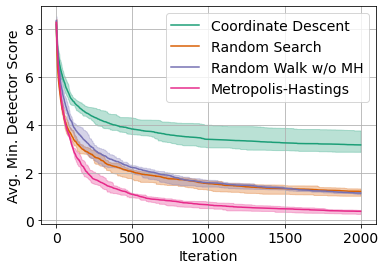

In [263]:
plt.rcParams.update({'font.size': 14})

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette())

plt.fill_between(range(2001), coord_min, coord_max, alpha=0.3, color=l_C[0])
plt.plot(range(2001), coord_mean, label='Coordinate Descent', c=l_C[0])

plt.fill_between(range(2000), random_min, random_max, alpha=0.3, color=l_C[1])
plt.plot(range(2000), random_mean, label='Random Search', c=l_C[1])


plt.fill_between(range(2001), noMH_min, noMH_max, alpha=0.3, color=l_C[2])
plt.plot(range(2001), noMH_mean, label='Random Walk w/o MH', c=l_C[2])

plt.fill_between(range(2001), MH_min, MH_max, alpha=0.3, color=l_C[3])
plt.plot(range(2001), MH_mean, label='Metropolis-Hastings', c=l_C[3])

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Avg. Min. Detector Score')
plt.grid()
plt.savefig('fig_optimization_comparison.pdf', bbox_inches='tight')

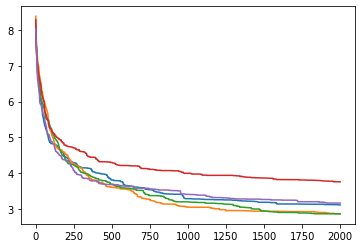

In [207]:
for i in range(5):
    plt.plot(l_cummin_coord[i])

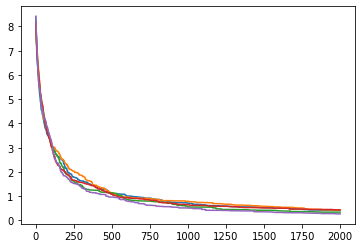

In [209]:
for i in range(5):
    plt.plot(l_cummin_MH[i])

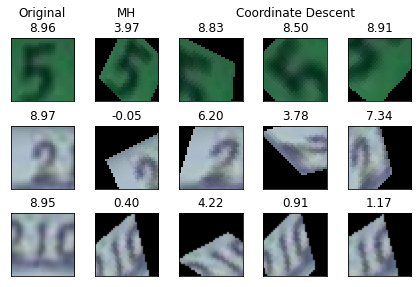

In [125]:
# fig, axs = plt.subplots(nrows=3, ncols=5)

# l_selected = [0,1,2]
# for i_row, i_img in enumerate(l_selected):
#     axs[i_row][0].imshow(batch[i_img].permute(1,2,0))
#     if i_row == 0:
#         axs[i_row][0].set_title(f'Original\n{float(img_E[i_img]):.2f}')
#     else:
#         axs[i_row][0].set_title(f'{float(img_E[i_img]):.2f}')

#     axs[i_row][1].imshow(MH_x[i_img].permute(1,2,0))
#     if i_row == 0:
#         axs[i_row][1].set_title(f'MH\n{float(MH_e[i_img]):.2f}')
#     else:
#         axs[i_row][1].set_title(f'{float(MH_e[i_img]):.2f}')

#     axs[i_row][2].imshow(coord_x_1[i_img].permute(1,2,0))
#     axs[i_row][2].set_title(f'{float(coord_min_e_1[i_img]):.2f}')
#     axs[i_row][3].imshow(coord_x_2[i_img].permute(1,2,0))
#     if i_row == 0:        
#         axs[i_row][3].set_title(f'Coordinate Descent\n{float(coord_min_e_2[i_img]):.2f}')
#     else:
#         axs[i_row][3].set_title(f'{float(coord_min_e_2[i_img]):.2f}')
#     axs[i_row][4].imshow(coord_x_3[i_img].permute(1,2,0))
#     axs[i_row][4].set_title(f'{float(coord_min_e_3[i_img]):.2f}')
# # axs[0].imshow(l_x[0].permute(1,2,0))
# # axs[0].set_title('asdf')
# # axs[0].set_xmargin(10)
# # axs[1].imshow(l_x[1].permute(1,2,0))
# for ax in axs.flatten():
#     ax.set_xticks([]); ax.set_yticks([]);
# plt.tight_layout()